In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from efficient_apriori import apriori as efficient_apriori
from apyori import apriori as apyori
import time
import numpy as np

In [5]:
def load_data(filename):
    data = pd.read_csv(filename, header=None)
    # Удаляем пустые значения и создаем список транзакций
    transactions = data.values.tolist()
    transactions = [[item for item in transaction if str(item) != 'nan'] 
                   for transaction in transactions]
    return transactions

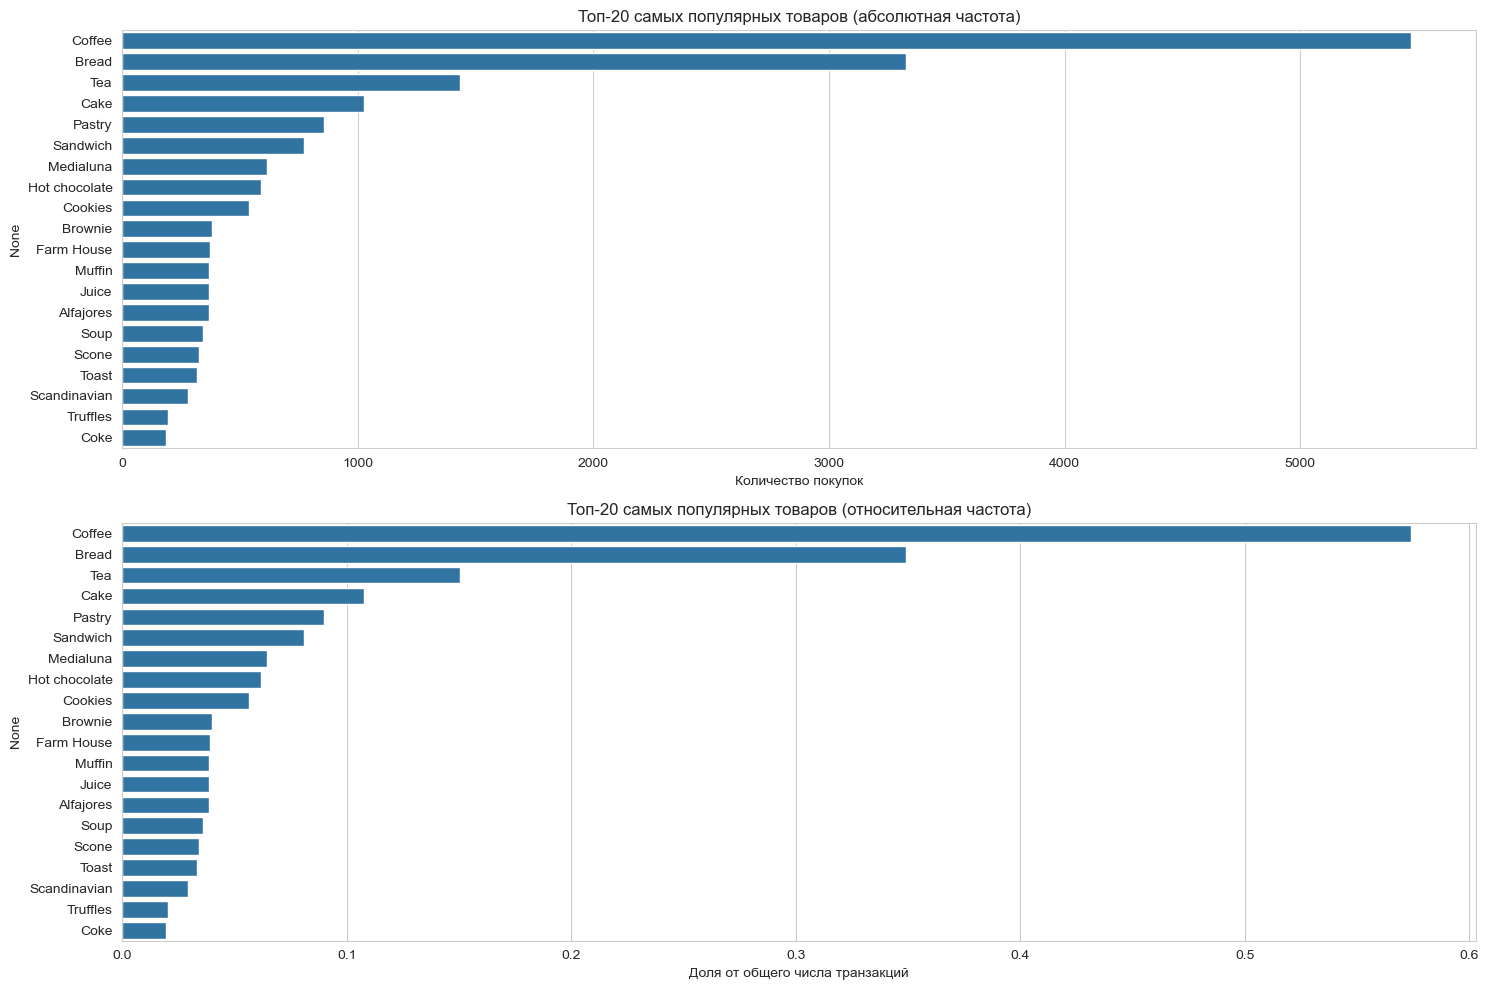

In [6]:
transactions = load_data('data.csv')

all_items = [item for sublist in transactions for item in sublist]
# Подсчитываем частоту каждого товара
item_counts = pd.Series(all_items).value_counts()

# Берем топ-20 товаров
top_20 = item_counts.head(20)

# Создаем график
plt.figure(figsize=(15, 10))

# Абсолютная частота
plt.subplot(2, 1, 1)
sns.barplot(x=top_20.values, y=top_20.index)
plt.title('Топ-20 самых популярных товаров (абсолютная частота)')
plt.xlabel('Количество покупок')

# Относительная частота
plt.subplot(2, 1, 2)
relative_freq = top_20 / len(transactions)
sns.barplot(x=relative_freq.values, y=relative_freq.index)
plt.title('Топ-20 самых популярных товаров (относительная частота)')
plt.xlabel('Доля от общего числа транзакций')

plt.tight_layout()
plt.show()

In [11]:
execution_times = {}
    
# Apriori (mlxtend)
start_time = time.time()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules_mlxtend = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
execution_times['Apriori (mlxtend)'] = time.time() - start_time

# Efficient Apriori
start_time = time.time()
itemsets, rules_efficient = efficient_apriori(transactions, min_support=0.01, min_confidence=0.5)
execution_times['Efficient Apriori'] = time.time() - start_time

# Apyori
start_time = time.time()
rules_apyori = list(apyori(transactions, min_support=0.01, min_confidence=0.5))
execution_times['Apyori'] = time.time() - start_time

print(execution_times)
print(f'mlxtend: {rules_mlxtend}')
print(f'apyori: {rules_apyori}')
print(f'efficient: {rules_efficient}')

{'Apriori (mlxtend)': 0.027404308319091797, 'Efficient Apriori': 0.006394147872924805, 'Apyori': 0.008526086807250977}
mlxtend:          antecedents consequents  antecedent support  consequent support  \
0        (Alfajores)    (Coffee)            0.036093            0.475081   
1             (Cake)    (Coffee)            0.103137            0.475081   
2          (Cookies)    (Coffee)            0.054034            0.475081   
3    (Hot chocolate)    (Coffee)            0.057916            0.475081   
4            (Juice)    (Coffee)            0.038296            0.475081   
5        (Medialuna)    (Coffee)            0.061379            0.475081   
6           (Pastry)    (Coffee)            0.085510            0.475081   
7         (Sandwich)    (Coffee)            0.071346            0.475081   
8            (Scone)    (Coffee)            0.034309            0.475081   
9   (Spanish Brunch)    (Coffee)            0.018046            0.475081   
10           (Toast)    (Coffee)    

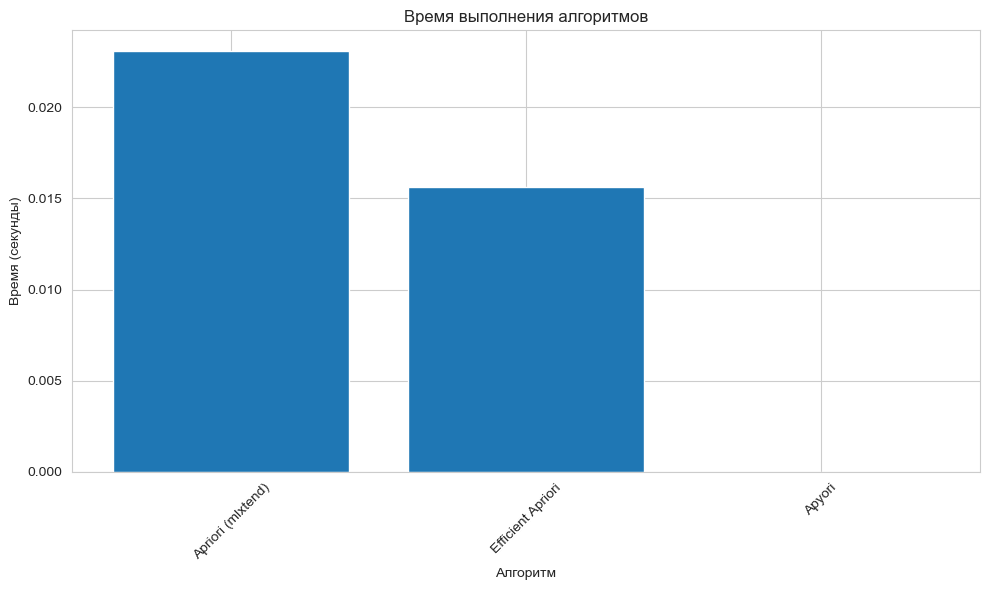

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(execution_times.keys(), execution_times.values())
plt.title('Время выполнения алгоритмов')
plt.xlabel('Алгоритм')
plt.ylabel('Время (секунды)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()